# 🎛️ Notebook 3 - Paramètres et Optimisation

## 🎯 Objectifs
- Maîtriser tous les paramètres des LLM (temperature, top_p, frequency_penalty, etc.)
- Comprendre l'impact de chaque paramètre sur la génération
- Optimiser les configurations pour différents cas d'usage
- Créer vos propres configurations personnalisées

---

## 📋 Sommaire
1. [🌡️ Temperature - Contrôle de la Créativité](#temperature)
2. [🎯 Top-p - Échantillonnage Nucléaire](#top_p)
3. [🔄 Frequency & Presence Penalty](#penalties)
4. [📏 Max Tokens et Stop Sequences](#tokens)
5. [🧪 Expérimentations Interactives](#experiments)
6. [⚙️ Configurations Optimales](#configs)
7. [🏆 Cas d'Usage Avancés](#advanced)

---

## 🔧 Configuration et Imports

In [1]:
import os
import json
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List, Optional, Tuple
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🎛️ Module Paramètres et Optimisation LLM")
print("=" * 50)

🎛️ Module Paramètres et Optimisation LLM


<a id="temperature"></a>
## 🌡️ 1. Temperature - Contrôle de la Créativité

### 🧠 Comprendre la Temperature

La **temperature** contrôle la randomness (caractère aléatoire) de la génération :
- **0.0** → Déterministe, toujours la même réponse
- **0.1-0.3** → Très cohérent, factuel
- **0.5-0.7** → Équilibré, conversationnel
- **0.8-1.0** → Créatif, original
- **>1.2** → Très créatif mais parfois incohérent

In [2]:
def simulate_temperature_effect(prompt, temperatures=[0.1, 0.5, 0.9, 1.5]):
    """
    Simule l'effet de différentes températures
    """
    print(f"🌡️ Impact de la Temperature")
    print(f"📝 Prompt : '{prompt}'")
    print("=" * 60)
    
    # Réponses simulées selon la température
    responses = {
        0.1: {
            "text": "Paris est la capitale de la France. Elle est située sur la Seine et compte environ 2,2 millions d'habitants.",
            "style": "📋 Factuel et précis",
            "variance": "Très faible"
        },
        0.5: {
            "text": "Paris, la magnifique capitale française ! Cette ville lumière séduit par ses monuments emblématiques et son art de vivre unique.",
            "style": "💬 Conversationnel",
            "variance": "Modérée"
        },
        0.9: {
            "text": "Ah, Paris ! Cette symphonie urbaine où chaque pavé raconte une histoire, où les cafés murmurent les secrets des amoureux...",
            "style": "🎨 Créatif et poétique",
            "variance": "Élevée"
        },
        1.5: {
            "text": "Paris-Paris-PARIS! Métropole-accordéon qui danse sur les nuages de croissants, où les lampadaires jouent du jazz pour les pigeons philosophes!",
            "style": "🌪️ Très créatif/chaotique",
            "variance": "Très élevée"
        }
    }
    
    for temp in temperatures:
        if temp in responses:
            resp = responses[temp]
            print(f"\n🌡️ Temperature {temp}")
            print(f"   Style : {resp['style']}")
            print(f"   Variance : {resp['variance']}")
            print(f"   Réponse : {resp['text']}")
            print("-" * 40)

# Test avec différents prompts
simulate_temperature_effect("Décris-moi Paris en une phrase")

print("\n" + "=" * 60)
simulate_temperature_effect("Écris le début d'une histoire de science-fiction")

🌡️ Impact de la Temperature
📝 Prompt : 'Décris-moi Paris en une phrase'

🌡️ Temperature 0.1
   Style : 📋 Factuel et précis
   Variance : Très faible
   Réponse : Paris est la capitale de la France. Elle est située sur la Seine et compte environ 2,2 millions d'habitants.
----------------------------------------

🌡️ Temperature 0.5
   Style : 💬 Conversationnel
   Variance : Modérée
   Réponse : Paris, la magnifique capitale française ! Cette ville lumière séduit par ses monuments emblématiques et son art de vivre unique.
----------------------------------------

🌡️ Temperature 0.9
   Style : 🎨 Créatif et poétique
   Variance : Élevée
   Réponse : Ah, Paris ! Cette symphonie urbaine où chaque pavé raconte une histoire, où les cafés murmurent les secrets des amoureux...
----------------------------------------

🌡️ Temperature 1.5
   Style : 🌪️ Très créatif/chaotique
   Variance : Très élevée
   Réponse : Paris-Paris-PARIS! Métropole-accordéon qui danse sur les nuages de croissants, où les 

### 📊 Visualisation de l'Impact de la Temperature

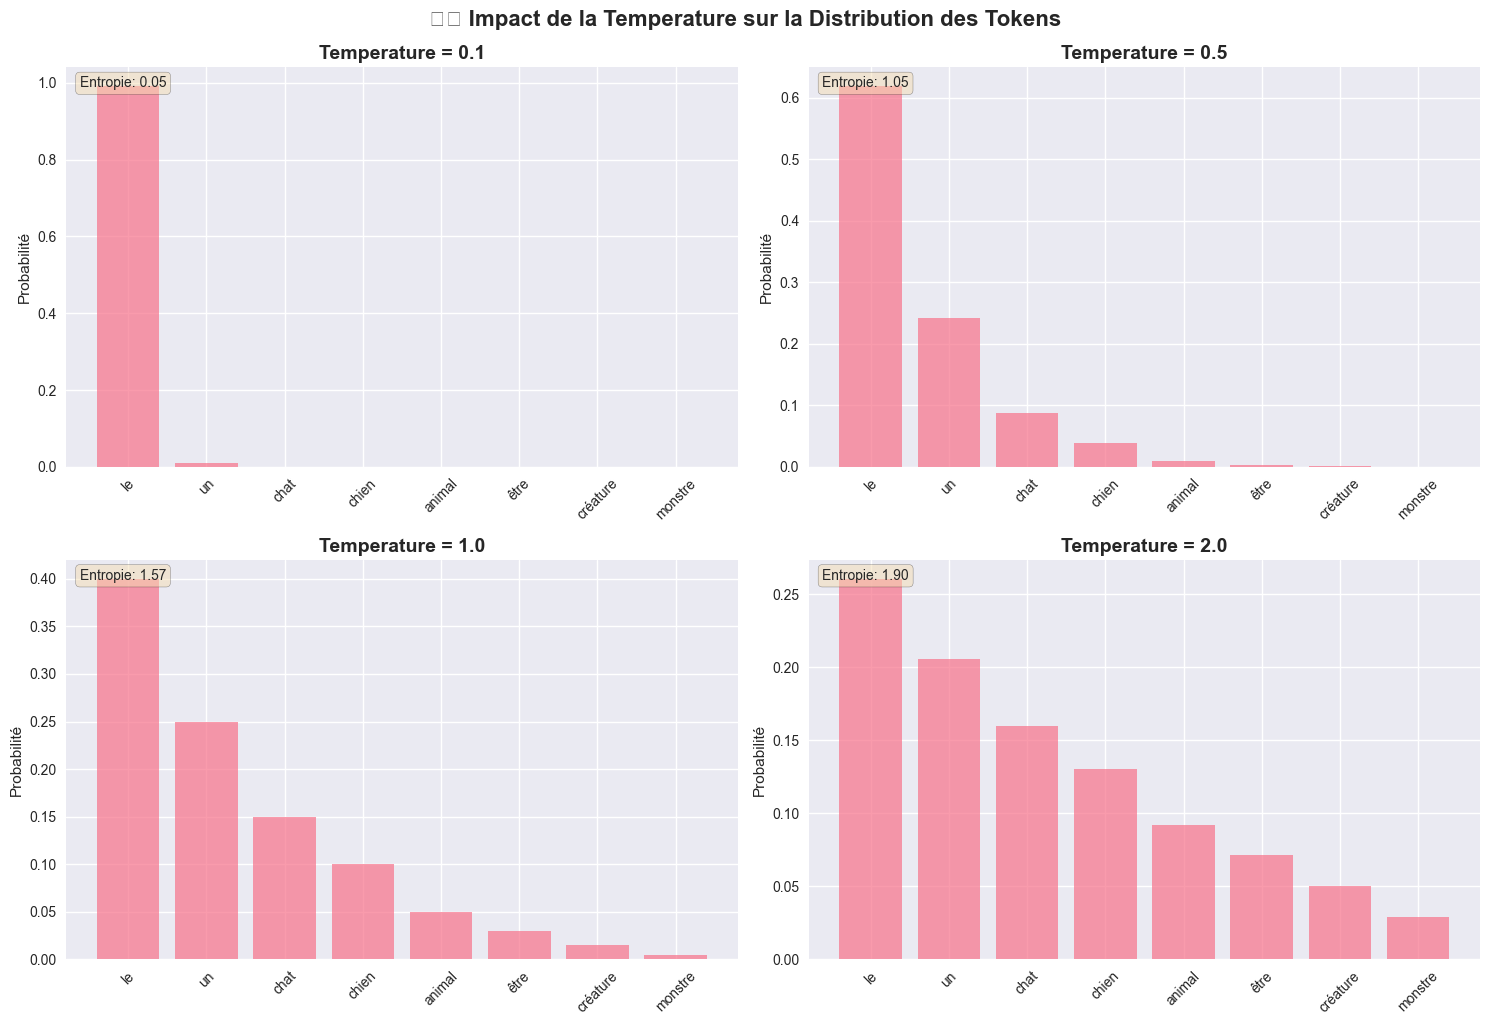

📊 Observations :
• Temperature faible (0.1) → Distribution très concentrée
• Temperature modérée (0.5-1.0) → Distribution équilibrée
• Temperature élevée (2.0) → Distribution très étalée
• Entropie ↑ = Créativité ↑ mais Cohérence ↓


In [16]:
def visualize_temperature_distribution():
    """
    Visualise l'effet de la temperature sur la distribution des probabilités
    """
    # Simulation de probabilités de tokens
    tokens = ['le', 'un', 'chat', 'chien', 'animal', 'être', 'créature', 'monstre']
    base_probs = np.array([0.4, 0.25, 0.15, 0.1, 0.05, 0.03, 0.015, 0.005])
    
    temperatures = [0.1, 0.5, 1.0, 2.0]
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.ravel()
    
    for i, temp in enumerate(temperatures):
        # Application de la temperature
        if temp == 0:
            probs = np.zeros_like(base_probs)
            probs[0] = 1.0  # Déterministe
        else:
            logits = np.log(base_probs + 1e-10) / temp
            probs = np.exp(logits) / np.sum(np.exp(logits))
        
        # Graphique
        axes[i].bar(tokens, probs, alpha=0.7)
        axes[i].set_title(f'Temperature = {temp}', fontsize=14, fontweight='bold')
        axes[i].set_ylabel('Probabilité')
        axes[i].tick_params(axis='x', rotation=45)
        
        # Statistiques
        entropy = -np.sum(probs * np.log(probs + 1e-10))
        axes[i].text(0.02, 0.95, f'Entropie: {entropy:.2f}', 
                    transform=axes[i].transAxes, fontsize=10,
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    plt.suptitle('🌡️ Impact de la Temperature sur la Distribution des Tokens', 
                 fontsize=16, fontweight='bold', y=1.02)
    plt.show()
    
    print("📊 Observations :")
    print("• Temperature faible (0.1) → Distribution très concentrée")
    print("• Temperature modérée (0.5-1.0) → Distribution équilibrée")
    print("• Temperature élevée (2.0) → Distribution très étalée")
    print("• Entropie ↑ = Créativité ↑ mais Cohérence ↓")

visualize_temperature_distribution()

<a id="top_p"></a>
## 🎯 2. Top-p - Échantillonnage Nucléaire

### 🧠 Comprendre Top-p (Nucleus Sampling)

Le **top-p** sélectionne dynamiquement les tokens les plus probables :
- **0.1** → Seuls les 10% de tokens les plus probables
- **0.5** → Les tokens couvrant 50% de la probabilité
- **0.9** → Les tokens couvrant 90% de la probabilité
- **1.0** → Tous les tokens (pas de filtrage)

In [17]:
def demonstrate_top_p():
    """
    Démontre l'effet du paramètre top-p
    """
    print("🎯 Échantillonnage Nucléaire (Top-p)")
    print("=" * 50)
    
    # Simulation d'une distribution de probabilités
    tokens = ['chat', 'chien', 'animal', 'être', 'créature', 'monstre', 'dragon', 'licorne']
    probs = np.array([0.3, 0.25, 0.2, 0.1, 0.08, 0.04, 0.02, 0.01])
    
    # Calcul des probabilités cumulées
    cumsum = np.cumsum(probs)
    
    print(f"📊 Distribution originale :")
    for token, prob, cum in zip(tokens, probs, cumsum):
        print(f"   {token:10} : {prob:5.2f} (cumul: {cum:.2f})")
    
    print("\n" + "="*50)
    
    # Test de différentes valeurs de top-p
    top_p_values = [0.5, 0.7, 0.9, 1.0]
    
    for top_p in top_p_values:
        # Filtrage selon top-p
        valid_indices = cumsum <= top_p
        if not np.any(valid_indices):
            valid_indices[0] = True  # Garder au moins le premier token
        
        selected_tokens = np.array(tokens)[valid_indices]
        selected_probs = probs[valid_indices]
        
        # Renormalisation
        selected_probs = selected_probs / np.sum(selected_probs)
        
        print(f"\n🎯 Top-p = {top_p}")
        print(f"   Tokens sélectionnés : {len(selected_tokens)}/{len(tokens)}")
        print(f"   Vocabulaire : {', '.join(selected_tokens)}")
        
        # Calcul de la diversité
        entropy = -np.sum(selected_probs * np.log(selected_probs + 1e-10))
        print(f"   Entropie : {entropy:.3f}")
        print(f"   Impact : {'Très focalisé' if top_p < 0.6 else 'Équilibré' if top_p < 0.9 else 'Très ouvert'}")

demonstrate_top_p()

🎯 Échantillonnage Nucléaire (Top-p)
📊 Distribution originale :
   chat       :  0.30 (cumul: 0.30)
   chien      :  0.25 (cumul: 0.55)
   animal     :  0.20 (cumul: 0.75)
   être       :  0.10 (cumul: 0.85)
   créature   :  0.08 (cumul: 0.93)
   monstre    :  0.04 (cumul: 0.97)
   dragon     :  0.02 (cumul: 0.99)
   licorne    :  0.01 (cumul: 1.00)


🎯 Top-p = 0.5
   Tokens sélectionnés : 1/8
   Vocabulaire : chat
   Entropie : -0.000
   Impact : Très focalisé

🎯 Top-p = 0.7
   Tokens sélectionnés : 2/8
   Vocabulaire : chat, chien
   Entropie : 0.689
   Impact : Équilibré

🎯 Top-p = 0.9
   Tokens sélectionnés : 4/8
   Vocabulaire : chat, chien, animal, être
   Entropie : 1.320
   Impact : Très ouvert

🎯 Top-p = 1.0
   Tokens sélectionnés : 8/8
   Vocabulaire : chat, chien, animal, être, créature, monstre, dragon, licorne
   Entropie : 1.715
   Impact : Très ouvert


### 🔄 Temperature vs Top-p : Quelle Différence ?

In [5]:
def compare_temperature_vs_top_p():
    """
    Compare l'effet de temperature vs top-p
    """
    print("⚖️ Temperature vs Top-p : Comparaison")
    print("=" * 60)
    
    scenarios = {
        "Réponse factuelle (QA)": {
            "temp_low": "Paris est la capitale de la France.",
            "temp_high": "Paris, cette métropole enchanteresse, règne majestueusement sur l'Hexagone !",
            "top_p_low": "Paris est la capitale de la France.",
            "top_p_high": "Paris constitue la capitale française, siège du gouvernement."
        },
        "Génération créative": {
            "temp_low": "Il était une fois un chat qui aimait lire.",
            "temp_high": "Miaouvelous ! Un matou-philosophe dévorait les grimoires sous la lune dansante !",
            "top_p_low": "Il était une fois un chat qui aimait lire.",
            "top_p_high": "Un chat passionné de littérature explorait sa bibliothèque personnelle."
        }
    }
    
    for scenario, responses in scenarios.items():
        print(f"\n📖 Scénario : {scenario}")
        print("-" * 40)
        
        print(f"🌡️ Temperature faible (0.2) : {responses['temp_low']}")
        print(f"🌡️ Temperature élevée (1.2) : {responses['temp_high']}")
        print(f"🎯 Top-p faible (0.3) : {responses['top_p_low']}")
        print(f"🎯 Top-p élevé (0.9) : {responses['top_p_high']}")
    
    print("\n" + "=" * 60)
    print("🎯 RÈGLES D'OR pour combiner Temperature et Top-p :")
    print("\n📋 Tâches factuelles :")
    print("   • Temperature = 0.1-0.3, Top-p = 0.1-0.5")
    print("   • Privilégier la cohérence et la précision")
    
    print("\n💬 Conversation naturelle :")
    print("   • Temperature = 0.6-0.8, Top-p = 0.8-0.9")
    print("   • Équilibre entre naturel et cohérence")
    
    print("\n🎨 Génération créative :")
    print("   • Temperature = 0.8-1.2, Top-p = 0.7-0.95")
    print("   • Favoriser l'originalité et la surprise")
    
    print("\n💡 Conseil : Ajustez UN paramètre à la fois pour comprendre l'impact !")

compare_temperature_vs_top_p()

⚖️ Temperature vs Top-p : Comparaison

📖 Scénario : Réponse factuelle (QA)
----------------------------------------
🌡️ Temperature faible (0.2) : Paris est la capitale de la France.
🌡️ Temperature élevée (1.2) : Paris, cette métropole enchanteresse, règne majestueusement sur l'Hexagone !
🎯 Top-p faible (0.3) : Paris est la capitale de la France.
🎯 Top-p élevé (0.9) : Paris constitue la capitale française, siège du gouvernement.

📖 Scénario : Génération créative
----------------------------------------
🌡️ Temperature faible (0.2) : Il était une fois un chat qui aimait lire.
🌡️ Temperature élevée (1.2) : Miaouvelous ! Un matou-philosophe dévorait les grimoires sous la lune dansante !
🎯 Top-p faible (0.3) : Il était une fois un chat qui aimait lire.
🎯 Top-p élevé (0.9) : Un chat passionné de littérature explorait sa bibliothèque personnelle.

🎯 RÈGLES D'OR pour combiner Temperature et Top-p :

📋 Tâches factuelles :
   • Temperature = 0.1-0.3, Top-p = 0.1-0.5
   • Privilégier la cohérence 

<a id="penalties"></a>
## 🔄 3. Frequency & Presence Penalty

### 🧠 Comprendre les Pénalités

- **Frequency Penalty** : Pénalise les tokens selon leur fréquence d'apparition
- **Presence Penalty** : Pénalise les tokens déjà apparus (peu importe la fréquence)
- **Plage** : -2.0 à +2.0 (négatif = encourage, positif = décourage)

In [18]:
def demonstrate_penalties():
    """
    Démontre l'effet des pénalités de fréquence et de présence
    """
    print("🔄 Frequency & Presence Penalty")
    print("=" * 50)
    
    # Simulation d'un texte répétitif
    base_text = "Le chat mange. Le chat dort. Le chat joue. Le chat..."
    
    penalties = {
        "Aucune pénalité": {
            "freq": 0.0, "pres": 0.0,
            "result": "Le chat mange. Le chat dort. Le chat joue. Le chat mange encore.",
            "analysis": "Répétitions fréquentes, manque de diversité"
        },
        "Frequency penalty = 0.5": {
            "freq": 0.5, "pres": 0.0,
            "result": "Le chat mange. L'animal dort. Le félin joue. Notre compagnon explore.",
            "analysis": "Réduction progressive des répétitions"
        },
        "Presence penalty = 0.5": {
            "freq": 0.0, "pres": 0.5,
            "result": "Le chat mange. Il dort paisiblement. Puis joue activement. Ensuite explore curieusement.",
            "analysis": "Évite immédiatement les mots déjà utilisés"
        },
        "Les deux = 0.3": {
            "freq": 0.3, "pres": 0.3,
            "result": "Le chat mange goulûment. Il se repose tranquillement. Puis s'amuse joyeusement. Enfin découvre attentivement.",
            "analysis": "Excellent équilibre diversité/cohérence"
        }
    }
    
    for config, details in penalties.items():
        print(f"\n⚙️ Configuration : {config}")
        print(f"   Frequency penalty : {details['freq']}")
        print(f"   Presence penalty  : {details['pres']}")
        print(f"   Résultat : {details['result']}")
        print(f"   📊 Analyse : {details['analysis']}")
        print("-" * 50)
    
    print("\n💡 GUIDES D'UTILISATION :")
    print("\n🔄 Frequency Penalty :")
    print("   • 0.0-0.3 : Léger découragement des répétitions")
    print("   • 0.4-0.8 : Forte réduction des répétitions")
    print("   • 0.9-2.0 : Évitement quasi-total des répétitions")
    
    print("\n🎯 Presence Penalty :")
    print("   • 0.0-0.3 : Légère diversification du vocabulaire")
    print("   • 0.4-0.8 : Forte diversification")
    print("   • 0.9-2.0 : Évitement systématique (peut nuire à la cohérence)")

demonstrate_penalties()

🔄 Frequency & Presence Penalty

⚙️ Configuration : Aucune pénalité
   Frequency penalty : 0.0
   Presence penalty  : 0.0
   Résultat : Le chat mange. Le chat dort. Le chat joue. Le chat mange encore.
   📊 Analyse : Répétitions fréquentes, manque de diversité
--------------------------------------------------

⚙️ Configuration : Frequency penalty = 0.5
   Frequency penalty : 0.5
   Presence penalty  : 0.0
   Résultat : Le chat mange. L'animal dort. Le félin joue. Notre compagnon explore.
   📊 Analyse : Réduction progressive des répétitions
--------------------------------------------------

⚙️ Configuration : Presence penalty = 0.5
   Frequency penalty : 0.0
   Presence penalty  : 0.5
   Résultat : Le chat mange. Il dort paisiblement. Puis joue activement. Ensuite explore curieusement.
   📊 Analyse : Évite immédiatement les mots déjà utilisés
--------------------------------------------------

⚙️ Configuration : Les deux = 0.3
   Frequency penalty : 0.3
   Presence penalty  : 0.3
   Rés

### 📊 Cas d'Usage des Pénalités

🎯 Guide des Pénalités par Cas d'Usage

📝 Rédaction d'articles
   Frequency penalty : 0.3
   Presence penalty  : 0.2
   💡 Pourquoi : Évite les répétitions ennuyeuses tout en gardant la cohérence
   📋 Exemples : Articles de blog, content marketing
--------------------------------------------------

🎨 Génération créative
   Frequency penalty : 0.5
   Presence penalty  : 0.4
   💡 Pourquoi : Force la créativité et l'originalité du vocabulaire
   📋 Exemples : Poésie, histoires courtes, brainstorming
--------------------------------------------------

💻 Génération de code
   Frequency penalty : 0.1
   Presence penalty  : 0.0
   💡 Pourquoi : Le code nécessite souvent des répétitions (variables, fonctions)
   📋 Exemples : Scripts, APIs, documentation technique
--------------------------------------------------

📊 Résumés et synthèses
   Frequency penalty : 0.2
   Presence penalty  : 0.1
   💡 Pourquoi : Diversification légère sans perdre les concepts clés
   📋 Exemples : Executive summaries, ana

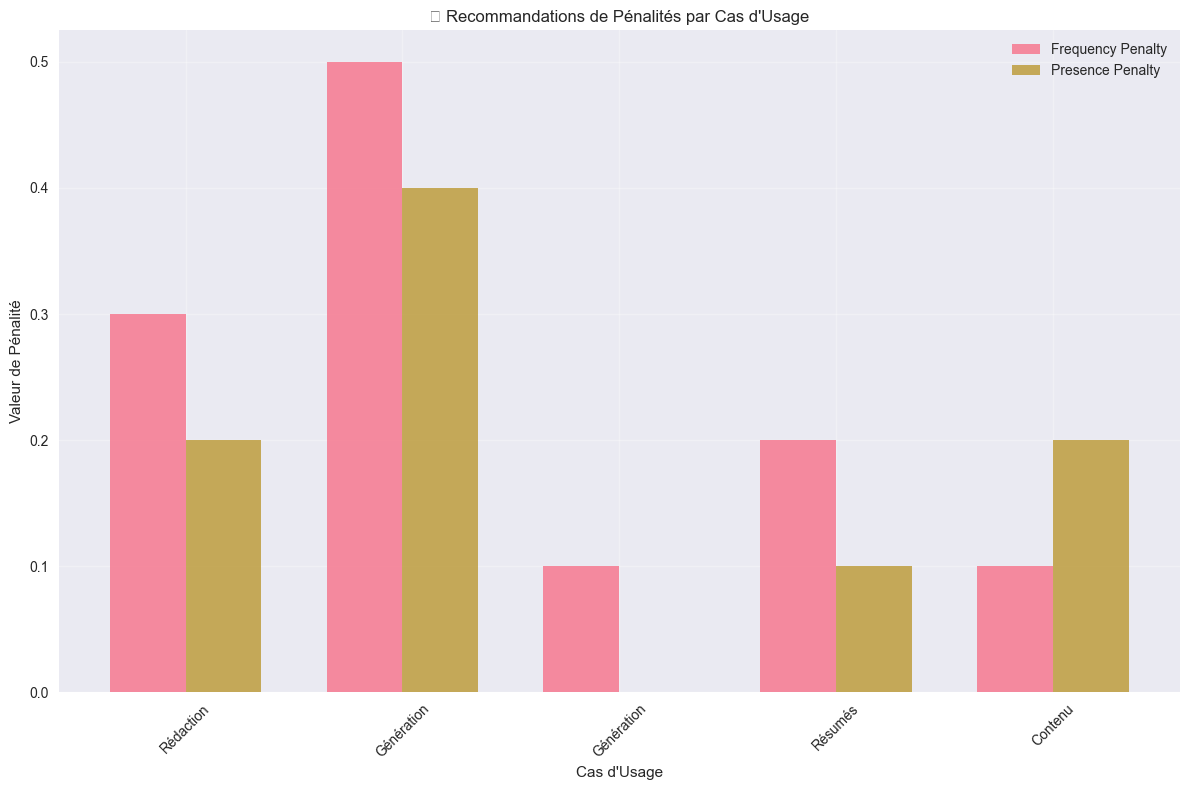

In [19]:
def penalty_use_cases():
    """
    Présente les cas d'usage optimaux pour les pénalités
    """
    use_cases = {
        "📝 Rédaction d'articles": {
            "freq": 0.3, "pres": 0.2,
            "reason": "Évite les répétitions ennuyeuses tout en gardant la cohérence",
            "example": "Articles de blog, content marketing"
        },
        "🎨 Génération créative": {
            "freq": 0.5, "pres": 0.4,
            "reason": "Force la créativité et l'originalité du vocabulaire",
            "example": "Poésie, histoires courtes, brainstorming"
        },
        "💻 Génération de code": {
            "freq": 0.1, "pres": 0.0,
            "reason": "Le code nécessite souvent des répétitions (variables, fonctions)",
            "example": "Scripts, APIs, documentation technique"
        },
        "📊 Résumés et synthèses": {
            "freq": 0.2, "pres": 0.1,
            "reason": "Diversification légère sans perdre les concepts clés",
            "example": "Executive summaries, analyses"
        },
        "🎓 Contenu éducatif": {
            "freq": 0.1, "pres": 0.2,
            "reason": "Répéter les concepts importants mais varier l'explication",
            "example": "Cours, tutoriels, explications"
        }
    }
    
    print("🎯 Guide des Pénalités par Cas d'Usage")
    print("=" * 60)
    
    for use_case, config in use_cases.items():
        print(f"\n{use_case}")
        print(f"   Frequency penalty : {config['freq']}")
        print(f"   Presence penalty  : {config['pres']}")
        print(f"   💡 Pourquoi : {config['reason']}")
        print(f"   📋 Exemples : {config['example']}")
        print("-" * 50)
    
    # Graphique de recommandations
    fig, ax = plt.subplots(figsize=(12, 8))
    
    use_case_names = list(use_cases.keys())
    freq_values = [config['freq'] for config in use_cases.values()]
    pres_values = [config['pres'] for config in use_cases.values()]
    
    x = np.arange(len(use_case_names))
    width = 0.35
    
    bars1 = ax.bar(x - width/2, freq_values, width, label='Frequency Penalty', alpha=0.8)
    bars2 = ax.bar(x + width/2, pres_values, width, label='Presence Penalty', alpha=0.8)
    
    ax.set_xlabel('Cas d\'Usage')
    ax.set_ylabel('Valeur de Pénalité')
    ax.set_title('🎯 Recommandations de Pénalités par Cas d\'Usage')
    ax.set_xticks(x)
    ax.set_xticklabels([name.split()[1] for name in use_case_names], rotation=45)
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

penalty_use_cases()

<a id="tokens"></a>
## 📏 4. Max Tokens et Stop Sequences

### 🎯 Contrôle de la Longueur avec Max Tokens

In [20]:
def demonstrate_max_tokens():
    """
    Démontre l'impact du paramètre max_tokens
    """
    print("📏 Contrôle de la Longueur avec Max Tokens")
    print("=" * 60)
    
    prompt = "Explique-moi l'intelligence artificielle"
    
    # Simulations avec différentes limites de tokens
    responses = {
        50: "L'intelligence artificielle (IA) est une technologie qui permet aux machines d'imiter l'intelligence humaine. Elle utilise des algorithmes complexes pour...",
        100: "L'intelligence artificielle (IA) est une technologie qui permet aux machines d'imiter l'intelligence humaine. Elle utilise des algorithmes complexes pour analyser des données, apprendre des modèles et prendre des décisions. L'IA inclut le machine learning, les réseaux de neurones...",
        200: "L'intelligence artificielle (IA) est une technologie qui permet aux machines d'imiter l'intelligence humaine. Elle utilise des algorithmes complexes pour analyser des données, apprendre des modèles et prendre des décisions. L'IA inclut le machine learning, les réseaux de neurones, et le deep learning. Les applications vont des assistants virtuels aux voitures autonomes, en passant par la reconnaissance d'images et le traitement du langage naturel. Cette technologie révolutionne..."
    }
    
    print(f"📝 Prompt : '{prompt}'\n")
    
    for max_tokens, response in responses.items():
        actual_length = len(response.split())
        token_estimate = len(response) // 4  # Approximation
        
        print(f"⚙️ Max tokens : {max_tokens}")
        print(f"   Longueur réelle : ~{token_estimate} tokens ({actual_length} mots)")
        print(f"   Réponse : {response}")
        
        if token_estimate >= max_tokens * 0.9:
            print(f"   🚨 Réponse probablement tronquée !")
        else:
            print(f"   ✅ Réponse complète")
        
        print("-" * 50)
    
    print("\n💡 RECOMMANDATIONS Max Tokens :")
    print("• 🔸 Questions courtes : 50-150 tokens")
    print("• 🔹 Explications moyennes : 200-500 tokens")
    print("• 🔶 Articles longs : 800-2000 tokens")
    print("• 🔺 Génération libre : 2000+ tokens")
    print("\n⚠️ Attention : Plus de tokens = coût plus élevé !")

demonstrate_max_tokens()

📏 Contrôle de la Longueur avec Max Tokens
📝 Prompt : 'Explique-moi l'intelligence artificielle'

⚙️ Max tokens : 50
   Longueur réelle : ~39 tokens (19 mots)
   Réponse : L'intelligence artificielle (IA) est une technologie qui permet aux machines d'imiter l'intelligence humaine. Elle utilise des algorithmes complexes pour...
   ✅ Réponse complète
--------------------------------------------------
⚙️ Max tokens : 100
   Longueur réelle : ~70 tokens (38 mots)
   Réponse : L'intelligence artificielle (IA) est une technologie qui permet aux machines d'imiter l'intelligence humaine. Elle utilise des algorithmes complexes pour analyser des données, apprendre des modèles et prendre des décisions. L'IA inclut le machine learning, les réseaux de neurones...
   ✅ Réponse complète
--------------------------------------------------
⚙️ Max tokens : 200
   Longueur réelle : ~121 tokens (66 mots)
   Réponse : L'intelligence artificielle (IA) est une technologie qui permet aux machines d'imiter l'int

### 🛑 Stop Sequences - Contrôle Précis

In [9]:
def demonstrate_stop_sequences():
    """
    Démontre l'utilisation des stop sequences
    """
    print("🛑 Stop Sequences - Contrôle Précis")
    print("=" * 50)
    
    scenarios = {
        "💬 Dialogue structuré": {
            "stop": ["\nHumain:", "\nAssistant:"],
            "prompt": "Conversation entre un humain et un assistant IA.\nHumain: Bonjour !\nAssistant:",
            "response_without": "Bonjour ! Je suis ravi de vous rencontrer. Comment puis-je vous aider aujourd'hui ? J'espère que vous passez une excellente journée et que je peux répondre à toutes vos questions...",
            "response_with": "Bonjour ! Je suis ravi de vous rencontrer. Comment puis-je vous aider aujourd'hui ?"
        },
        "📝 Liste structurée": {
            "stop": ["\n\n", "Conclusion:"],
            "prompt": "Liste des avantages de l'IA :\n1.",
            "response_without": "Automatisation des tâches répétitives\n2. Analyse rapide de grandes quantités de données\n3. Aide à la prise de décision\n\nConclusion: L'IA offre de nombreux avantages mais présente aussi des défis...",
            "response_with": "Automatisation des tâches répétitives\n2. Analyse rapide de grandes quantités de données\n3. Aide à la prise de décision"
        },
        "💻 Génération de code": {
            "stop": ["\n# Test", "\nif __name__", "```"],
            "prompt": "Écris une fonction Python pour calculer la factorielle :\n```python\n",
            "response_without": "def factorielle(n):\n    if n <= 1:\n        return 1\n    return n * factorielle(n-1)\n\n# Test\nprint(factorielle(5))\n\nif __name__ == '__main__':\n    ...",
            "response_with": "def factorielle(n):\n    if n <= 1:\n        return 1\n    return n * factorielle(n-1)"
        }
    }
    
    for scenario, details in scenarios.items():
        print(f"\n{scenario}")
        print(f"Stop sequences : {details['stop']}")
        print(f"Prompt : {details['prompt']}")
        print("\n❌ Sans stop sequence :")
        print(f"   {details['response_without']}")
        print("\n✅ Avec stop sequence :")
        print(f"   {details['response_with']}")
        print("-" * 60)
    
    print("\n🎯 PATTERNS de Stop Sequences Utiles :")
    
    patterns = {
        "Dialogue": ["\nHumain:", "\nUser:", "\nQ:"],
        "Code": ["```", "\n# ", "\n//", "\n/*"],
        "Listes": ["\n\n", "Conclusion", "En résumé"],
        "Q&A": ["\nQuestion:", "\nQ:", "\n---"],
        "Sections": ["\n## ", "\n# ", "\n---"]
    }
    
    for pattern_type, sequences in patterns.items():
        print(f"\n🔹 {pattern_type} : {sequences}")

demonstrate_stop_sequences()

🛑 Stop Sequences - Contrôle Précis

💬 Dialogue structuré
Stop sequences : ['\nHumain:', '\nAssistant:']
Prompt : Conversation entre un humain et un assistant IA.
Humain: Bonjour !
Assistant:

❌ Sans stop sequence :
   Bonjour ! Je suis ravi de vous rencontrer. Comment puis-je vous aider aujourd'hui ? J'espère que vous passez une excellente journée et que je peux répondre à toutes vos questions...

✅ Avec stop sequence :
   Bonjour ! Je suis ravi de vous rencontrer. Comment puis-je vous aider aujourd'hui ?
------------------------------------------------------------

📝 Liste structurée
Stop sequences : ['\n\n', 'Conclusion:']
Prompt : Liste des avantages de l'IA :
1.

❌ Sans stop sequence :
   Automatisation des tâches répétitives
2. Analyse rapide de grandes quantités de données
3. Aide à la prise de décision

Conclusion: L'IA offre de nombreux avantages mais présente aussi des défis...

✅ Avec stop sequence :
   Automatisation des tâches répétitives
2. Analyse rapide de grandes quanti

<a id="experiments"></a>
## 🧪 5. Expérimentations Interactives

### 🎛️ Playground des Paramètres

🧪 Parameter Playground
📝 Prompt de test : 'Raconte-moi une histoire sur un robot qui apprend à peindre'

⚙️ Configuration : 🎯 Factuel & Précis
   Temperature: 0.2, Top-p: 0.3
   Freq penalty: 0.1, Pres penalty: 0.0
   Max tokens: 100

📝 Résultat :
   Un robot programmé pour l'art apprend la peinture en analysant les techniques classiques. Il étudie les couleurs, les formes et les compositions à travers des algorithmes de reconnaissance visuelle.
------------------------------------------------------------
⚙️ Configuration : 💬 Conversationnel
   Temperature: 0.7, Top-p: 0.8
   Freq penalty: 0.2, Pres penalty: 0.1
   Max tokens: 150

📝 Résultat :
   Il était une fois un petit robot nommé Picasso-Bot qui découvrit un pinceau abandonné. Curieux, il commença à expérimenter avec les couleurs, créant d'abord des gribouillis puis progressivement de vraies œuvres d'art.
------------------------------------------------------------
⚙️ Configuration : 🎨 Créatif & Original
   Temperature: 1.0, Top-

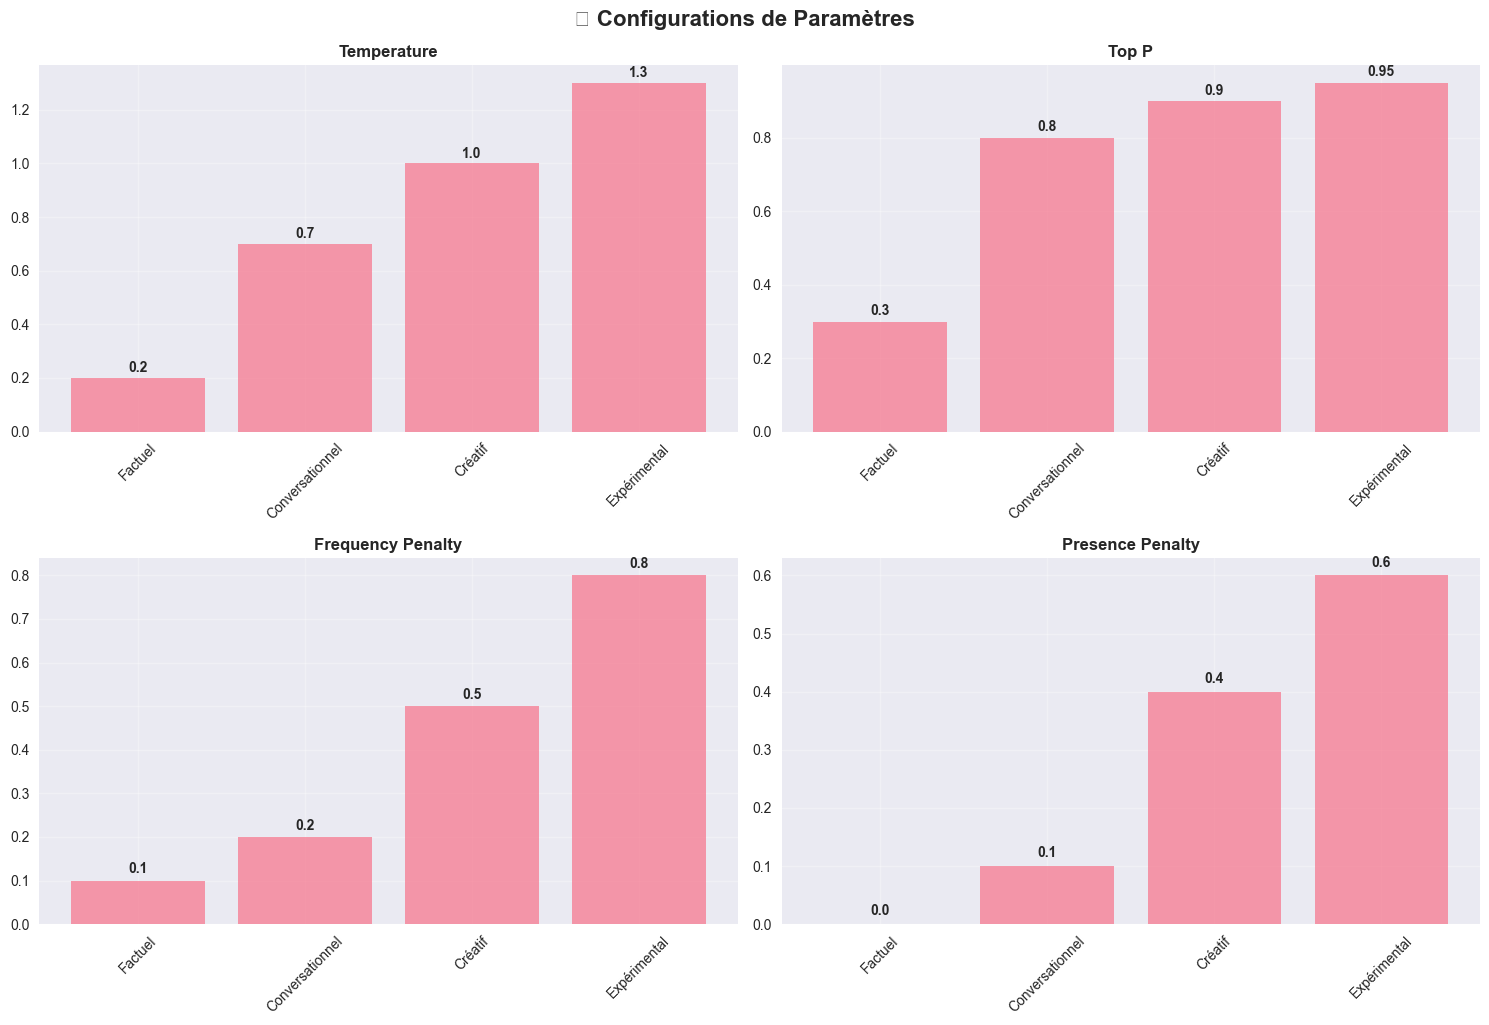

In [10]:
def parameter_playground():
    """
    Playground interactif pour expérimenter avec les paramètres
    """
    print("🧪 Parameter Playground")
    print("=" * 40)
    
    # Configuration de test
    test_configs = {
        "🎯 Factuel & Précis": {
            "temperature": 0.2,
            "top_p": 0.3,
            "frequency_penalty": 0.1,
            "presence_penalty": 0.0,
            "max_tokens": 100
        },
        "💬 Conversationnel": {
            "temperature": 0.7,
            "top_p": 0.8,
            "frequency_penalty": 0.2,
            "presence_penalty": 0.1,
            "max_tokens": 150
        },
        "🎨 Créatif & Original": {
            "temperature": 1.0,
            "top_p": 0.9,
            "frequency_penalty": 0.5,
            "presence_penalty": 0.4,
            "max_tokens": 200
        },
        "🌪️ Expérimental": {
            "temperature": 1.3,
            "top_p": 0.95,
            "frequency_penalty": 0.8,
            "presence_penalty": 0.6,
            "max_tokens": 250
        }
    }
    
    test_prompt = "Raconte-moi une histoire sur un robot qui apprend à peindre"
    
    print(f"📝 Prompt de test : '{test_prompt}'\n")
    
    # Simulations des réponses selon les configurations
    simulated_responses = {
        "🎯 Factuel & Précis": "Un robot programmé pour l'art apprend la peinture en analysant les techniques classiques. Il étudie les couleurs, les formes et les compositions à travers des algorithmes de reconnaissance visuelle.",
        
        "💬 Conversationnel": "Il était une fois un petit robot nommé Picasso-Bot qui découvrit un pinceau abandonné. Curieux, il commença à expérimenter avec les couleurs, créant d'abord des gribouillis puis progressivement de vraies œuvres d'art.",
        
        "🎨 Créatif & Original": "Dans l'atelier silencieux, R-7 contemplait les nuances chatoyantes. Ses capteurs traduisaient émotions en pigments, transformant algorithmes en symphonies visuelles. Chaque toile devenait un dialogue entre métal et inspiration.",
        
        "🌪️ Expérimental": "BZZT-création ! Mécanomorphe-artiste dansait-peignait avec tentacules-pinceaux, éclaboussant réalités-couleurs sur toiles-dimensions ! Émotions.exe = OVERFLOW_ARTISTIQUE dans matrices-rêves quantiques !"
    }
    
    for config_name, params in test_configs.items():
        print(f"⚙️ Configuration : {config_name}")
        print(f"   Temperature: {params['temperature']}, Top-p: {params['top_p']}")
        print(f"   Freq penalty: {params['frequency_penalty']}, Pres penalty: {params['presence_penalty']}")
        print(f"   Max tokens: {params['max_tokens']}")
        print(f"\n📝 Résultat :")
        print(f"   {simulated_responses[config_name]}")
        print("-" * 60)
    
    # Visualisation des configurations
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.ravel()
    
    config_names = list(test_configs.keys())
    params_to_plot = ['temperature', 'top_p', 'frequency_penalty', 'presence_penalty']
    
    for i, param in enumerate(params_to_plot):
        values = [test_configs[config][param] for config in config_names]
        
        bars = axes[i].bar(range(len(config_names)), values, alpha=0.7)
        axes[i].set_title(f'{param.replace("_", " ").title()}', fontweight='bold')
        axes[i].set_xticks(range(len(config_names)))
        axes[i].set_xticklabels([name.split()[1] for name in config_names], rotation=45)
        axes[i].grid(True, alpha=0.3)
        
        # Annotations des valeurs
        for bar, value in zip(bars, values):
            axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                        f'{value}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.suptitle('🧪 Configurations de Paramètres', fontsize=16, fontweight='bold', y=1.02)
    plt.show()

parameter_playground()

### 🔬 A/B Testing des Paramètres

In [11]:
def ab_test_parameters():
    """
    Teste l'impact de chaque paramètre individuellement
    """
    print("🔬 A/B Testing des Paramètres")
    print("=" * 50)
    
    base_config = {
        "temperature": 0.7,
        "top_p": 0.8,
        "frequency_penalty": 0.2,
        "presence_penalty": 0.1
    }
    
    # Tests A/B pour chaque paramètre
    ab_tests = {
        "Temperature": {
            "A (0.3)": {**base_config, "temperature": 0.3},
            "B (1.2)": {**base_config, "temperature": 1.2}
        },
        "Top-p": {
            "A (0.5)": {**base_config, "top_p": 0.5},
            "B (0.95)": {**base_config, "top_p": 0.95}
        },
        "Frequency Penalty": {
            "A (0.0)": {**base_config, "frequency_penalty": 0.0},
            "B (0.8)": {**base_config, "frequency_penalty": 0.8}
        }
    }
    
    prompt = "Décris un coucher de soleil en 3 phrases."
    
    # Résultats simulés pour chaque test
    results = {
        "Temperature": {
            "A (0.3)": "Le soleil descend lentement vers l'horizon occidental. Le ciel se teinte progressivement de couleurs orangées et rosées. La lumière décline graduellement jusqu'à la tombée de la nuit.",
            "B (1.2)": "Flammes célestes embrasent l'océan nuageux ! Symphonie chromatique explose en cascades dorées-pourpres. L'astre-roi s'évanouit dans une étreinte cosmique éblouissante !"
        },
        "Top-p": {
            "A (0.5)": "Le soleil descend doucement derrière les montagnes. Les couleurs changent du jaune au rouge dans le ciel. La nuit arrive tranquillement après ce spectacle.",
            "B (0.95)": "L'astre solaire effectue sa descente majestueuse vers l'horizon lointain. Une palette chromatique exceptionnelle s'épanouit progressivement dans la voûte céleste. Cette transition vespérale s'achève dans une sérénité contemplative."
        },
        "Frequency Penalty": {
            "A (0.0)": "Le soleil se couche dans le ciel. Le soleil crée des couleurs dans le ciel. Le soleil disparaît et le ciel devient sombre.",
            "B (0.8)": "L'astre doré descend vers l'horizon occidental. Des teintes flamboyantes embrasent la voûte céleste. Cette magnificence vespérale s'estompe progressivement dans l'obscurité naissante."
        }
    }
    
    print(f"📝 Prompt : '{prompt}'\n")
    
    for test_name, configs in ab_tests.items():
        print(f"🧪 Test A/B : {test_name}")
        print("=" * 30)
        
        for variant, config in configs.items():
            result = results[test_name][variant]
            
            print(f"\n🔹 Variant {variant}")
            print(f"   Config : {config}")
            print(f"   Résultat : {result}")
        
        # Analyse comparative
        print(f"\n📊 Analyse comparative :")
        if test_name == "Temperature":
            print("   • Version A : Plus factuelle et prévisible")
            print("   • Version B : Plus créative et expressive")
            print("   • Recommandation : A pour infos, B pour créativité")
        elif test_name == "Top-p":
            print("   • Version A : Vocabulaire plus commun")
            print("   • Version B : Vocabulaire plus riche et varié")
            print("   • Recommandation : A pour simplicité, B pour élégance")
        elif test_name == "Frequency Penalty":
            print("   • Version A : Répétitions fréquentes")
            print("   • Version B : Vocabulaire diversifié")
            print("   • Recommandation : B généralement préférable")
        
        print("-" * 60)

ab_test_parameters()

🔬 A/B Testing des Paramètres
📝 Prompt : 'Décris un coucher de soleil en 3 phrases.'

🧪 Test A/B : Temperature

🔹 Variant A (0.3)
   Config : {'temperature': 0.3, 'top_p': 0.8, 'frequency_penalty': 0.2, 'presence_penalty': 0.1}
   Résultat : Le soleil descend lentement vers l'horizon occidental. Le ciel se teinte progressivement de couleurs orangées et rosées. La lumière décline graduellement jusqu'à la tombée de la nuit.

🔹 Variant B (1.2)
   Config : {'temperature': 1.2, 'top_p': 0.8, 'frequency_penalty': 0.2, 'presence_penalty': 0.1}
   Résultat : Flammes célestes embrasent l'océan nuageux ! Symphonie chromatique explose en cascades dorées-pourpres. L'astre-roi s'évanouit dans une étreinte cosmique éblouissante !

📊 Analyse comparative :
   • Version A : Plus factuelle et prévisible
   • Version B : Plus créative et expressive
   • Recommandation : A pour infos, B pour créativité
------------------------------------------------------------
🧪 Test A/B : Top-p

🔹 Variant A (0.5)
   Con

<a id="configs"></a>
## ⚙️ 6. Configurations Optimales

### 🏆 Configurations par Cas d'Usage

🏆 Configurations Optimales par Cas d'Usage

🤖 Chatbot Customer Service
────────────────────────────────────────
🌡️  Temperature     : 0.3
🎯  Top-p          : 0.6
🔄  Freq penalty   : 0.2
👁️  Pres penalty   : 0.1
📏  Max tokens     : 200
🛑  Stop sequences : ['\nUtilisateur:', '\nClient:']
💰  Coût estimé    : $0.002/1K tokens
💡  Logique        : Réponses cohérentes et utiles, légère personnalité

📝 Rédaction de Contenu
────────────────────────────────────────
🌡️  Temperature     : 0.7
🎯  Top-p          : 0.8
🔄  Freq penalty   : 0.4
👁️  Pres penalty   : 0.3
📏  Max tokens     : 800
🛑  Stop sequences : ['\n## ', '\n---']
💰  Coût estimé    : $0.008/1K tokens
💡  Logique        : Créativité équilibrée, évite les répétitions

💻 Génération de Code
────────────────────────────────────────
🌡️  Temperature     : 0.2
🎯  Top-p          : 0.4
🔄  Freq penalty   : 0.0
👁️  Pres penalty   : 0.0
📏  Max tokens     : 500
🛑  Stop sequences : ['```', '\n# Test', '\n# Example']
💰  Coût estimé    : $0.005/1K token

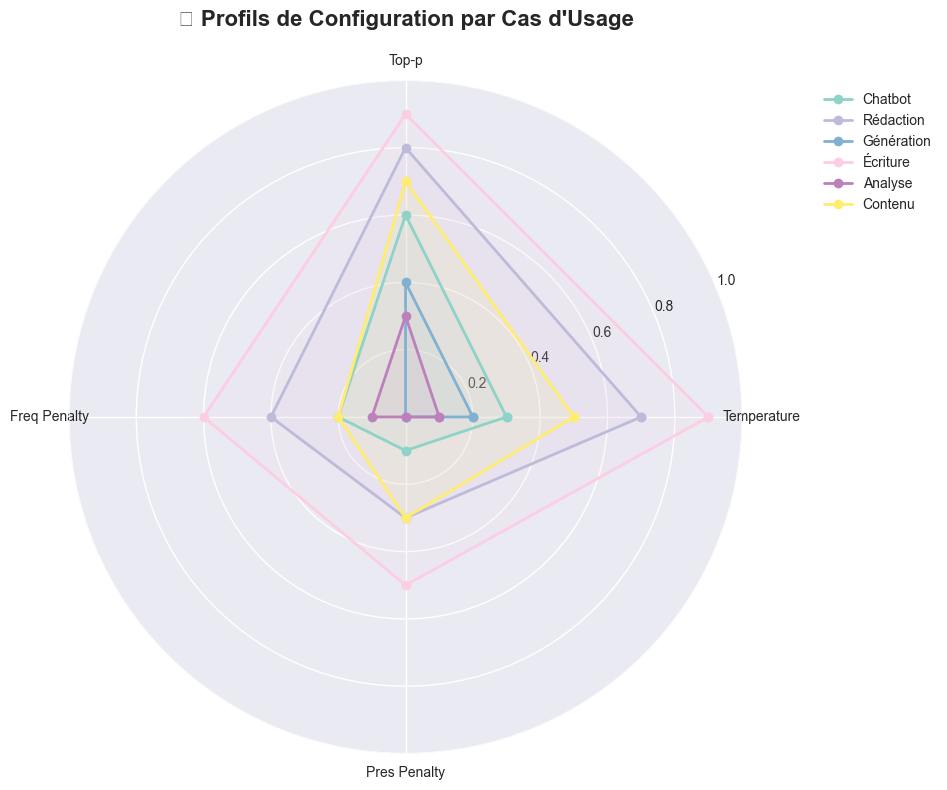

In [12]:
def optimal_configurations():
    """
    Présente les configurations optimales par cas d'usage
    """
    print("🏆 Configurations Optimales par Cas d'Usage")
    print("=" * 60)
    
    configs = {
        "🤖 Chatbot Customer Service": {
            "temperature": 0.3,
            "top_p": 0.6,
            "frequency_penalty": 0.2,
            "presence_penalty": 0.1,
            "max_tokens": 200,
            "rationale": "Réponses cohérentes et utiles, légère personnalité",
            "stop_sequences": ["\nUtilisateur:", "\nClient:"],
            "cost_per_1k": "$0.002"
        },
        "📝 Rédaction de Contenu": {
            "temperature": 0.7,
            "top_p": 0.8,
            "frequency_penalty": 0.4,
            "presence_penalty": 0.3,
            "max_tokens": 800,
            "rationale": "Créativité équilibrée, évite les répétitions",
            "stop_sequences": ["\n## ", "\n---"],
            "cost_per_1k": "$0.008"
        },
        "💻 Génération de Code": {
            "temperature": 0.2,
            "top_p": 0.4,
            "frequency_penalty": 0.0,
            "presence_penalty": 0.0,
            "max_tokens": 500,
            "rationale": "Précision technique, répétitions acceptées",
            "stop_sequences": ["```", "\n# Test", "\n# Example"],
            "cost_per_1k": "$0.005"
        },
        "🎨 Écriture Créative": {
            "temperature": 0.9,
            "top_p": 0.9,
            "frequency_penalty": 0.6,
            "presence_penalty": 0.5,
            "max_tokens": 1000,
            "rationale": "Maximum de créativité et d'originalité",
            "stop_sequences": ["\nFin.", "\nÉpilogue"],
            "cost_per_1k": "$0.012"
        },
        "📊 Analyse de Données": {
            "temperature": 0.1,
            "top_p": 0.3,
            "frequency_penalty": 0.1,
            "presence_penalty": 0.0,
            "max_tokens": 600,
            "rationale": "Précision maximale, analyses factuelles",
            "stop_sequences": ["\nConclusion:", "\n---"],
            "cost_per_1k": "$0.006"
        },
        "🎓 Contenu Éducatif": {
            "temperature": 0.5,
            "top_p": 0.7,
            "frequency_penalty": 0.2,
            "presence_penalty": 0.3,
            "max_tokens": 700,
            "rationale": "Clarté pédagogique, exemples variés",
            "stop_sequences": ["\nExercice:", "\nQuiz:"],
            "cost_per_1k": "$0.007"
        }
    }
    
    # Affichage détaillé
    for use_case, config in configs.items():
        print(f"\n{use_case}")
        print("─" * 40)
        print(f"🌡️  Temperature     : {config['temperature']}")
        print(f"🎯  Top-p          : {config['top_p']}")
        print(f"🔄  Freq penalty   : {config['frequency_penalty']}")
        print(f"👁️  Pres penalty   : {config['presence_penalty']}")
        print(f"📏  Max tokens     : {config['max_tokens']}")
        print(f"🛑  Stop sequences : {config['stop_sequences']}")
        print(f"💰  Coût estimé    : {config['cost_per_1k']}/1K tokens")
        print(f"💡  Logique        : {config['rationale']}")
    
    print("\n" + "=" * 60)
    
    # Matrice de comparaison
    comparison_data = []
    for use_case, config in configs.items():
        comparison_data.append({
            'Use Case': use_case.split()[1],  # Nom court
            'Temp': config['temperature'],
            'Top-p': config['top_p'],
            'Freq P.': config['frequency_penalty'],
            'Max Tokens': config['max_tokens'],
            'Cost': config['cost_per_1k']
        })
    
    # Graphique radar des configurations
    fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(projection='polar'))
    
    parameters = ['Temperature', 'Top-p', 'Freq Penalty', 'Pres Penalty']
    
    # Normalisation des valeurs pour le graphique radar (0-1)
    angles = np.linspace(0, 2 * np.pi, len(parameters), endpoint=False).tolist()
    angles += angles[:1]  # Fermer le cercle
    
    colors = plt.cm.Set3(np.linspace(0, 1, len(configs)))
    
    for i, (use_case, config) in enumerate(configs.items()):
        values = [
            config['temperature'] / 1.0,  # Normalisation
            config['top_p'],
            config['frequency_penalty'] / 1.0,
            config['presence_penalty'] / 1.0
        ]
        values += values[:1]  # Fermer le polygone
        
        ax.plot(angles, values, 'o-', linewidth=2, 
                label=use_case.split()[1], color=colors[i])
        ax.fill(angles, values, alpha=0.1, color=colors[i])
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(parameters)
    ax.set_ylim(0, 1)
    ax.set_title('🎯 Profils de Configuration par Cas d\'Usage', 
                 size=16, fontweight='bold', pad=20)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
    ax.grid(True)
    
    plt.tight_layout()
    plt.show()

optimal_configurations()

### 🔧 Générateur de Configuration Personnalisée

In [13]:
def configuration_generator():
    """
    Générateur interactif de configuration personnalisée
    """
    print("🔧 Générateur de Configuration Personnalisée")
    print("=" * 60)
    
    # Questionnaire pour déterminer la configuration optimale
    questions = {
        "task_type": {
            "question": "Quel est votre type de tâche principal ?",
            "options": {
                "1": "Génération factuelle/informative",
                "2": "Conversation/Chat", 
                "3": "Création de contenu",
                "4": "Génération de code",
                "5": "Analyse de données"
            }
        },
        "creativity_level": {
            "question": "Niveau de créativité souhaité ?",
            "options": {
                "1": "Très conservateur (précision max)",
                "2": "Légèrement créatif",
                "3": "Modérément créatif", 
                "4": "Très créatif",
                "5": "Extrêmement créatif"
            }
        },
        "length_preference": {
            "question": "Longueur de réponse préférée ?",
            "options": {
                "1": "Très courte (50-100 tokens)",
                "2": "Courte (100-200 tokens)",
                "3": "Moyenne (200-500 tokens)",
                "4": "Longue (500-1000 tokens)",
                "5": "Très longue (1000+ tokens)"
            }
        },
        "repetition_tolerance": {
            "question": "Tolérance aux répétitions ?",
            "options": {
                "1": "Aucune tolérance (diversité max)",
                "2": "Faible tolérance",
                "3": "Tolérance modérée",
                "4": "Haute tolérance",
                "5": "Répétitions acceptées"
            }
        }
    }
    
    # Simulation de réponses utilisateur (pour la démo)
    demo_answers = {
        "task_type": "3",  # Création de contenu
        "creativity_level": "4",  # Très créatif
        "length_preference": "3",  # Moyenne
        "repetition_tolerance": "2"  # Faible tolérance
    }
    
    print("📋 Simulation du questionnaire (réponses automatiques) :")
    print("-" * 50)
    
    for key, q_data in questions.items():
        answer = demo_answers[key]
        print(f"\n❓ {q_data['question']}")
        for opt_key, option in q_data['options'].items():
            marker = "✅" if opt_key == answer else "  "
            print(f"   {marker} {opt_key}. {option}")
    
    # Génération de la configuration basée sur les réponses
    def generate_config(answers):
        config = {}
        
        # Température basée sur créativité
        creativity_map = {"1": 0.1, "2": 0.3, "3": 0.6, "4": 0.9, "5": 1.2}
        config['temperature'] = creativity_map[answers['creativity_level']]
        
        # Top-p basé sur type de tâche et créativité
        if answers['task_type'] in ['1', '5']:  # Factuel/Analyse
            config['top_p'] = 0.3 + (int(answers['creativity_level']) - 1) * 0.1
        else:
            config['top_p'] = 0.5 + (int(answers['creativity_level']) - 1) * 0.1
        
        # Pénalités basées sur tolérance aux répétitions
        rep_tolerance = int(answers['repetition_tolerance'])
        config['frequency_penalty'] = (6 - rep_tolerance) * 0.15
        config['presence_penalty'] = (6 - rep_tolerance) * 0.1
        
        # Max tokens basé sur longueur préférée
        length_map = {"1": 75, "2": 150, "3": 350, "4": 750, "5": 1500}
        config['max_tokens'] = length_map[answers['length_preference']]
        
        # Stop sequences basées sur type de tâche
        stop_map = {
            "1": ["\n\n", "En conclusion"],  # Factuel
            "2": ["\nUtilisateur:", "\nHumain:"],  # Chat
            "3": ["\n## ", "\n---"],  # Contenu
            "4": ["```", "\n# "],  # Code
            "5": ["\nConclusion:", "\nRésumé:"]  # Analyse
        }
        config['stop_sequences'] = stop_map[answers['task_type']]
        
        return config
    
    generated_config = generate_config(demo_answers)
    
    print("\n" + "=" * 60)
    print("🎯 CONFIGURATION GÉNÉRÉE")
    print("=" * 60)
    
    print(f"🌡️  Temperature        : {generated_config['temperature']}")
    print(f"🎯  Top-p             : {generated_config['top_p']:.2f}")
    print(f"🔄  Frequency penalty : {generated_config['frequency_penalty']:.2f}")
    print(f"👁️  Presence penalty  : {generated_config['presence_penalty']:.2f}")
    print(f"📏  Max tokens        : {generated_config['max_tokens']}")
    print(f"🛑  Stop sequences    : {generated_config['stop_sequences']}")
    
    # Code JSON pour utilisation directe
    print("\n📋 Code JSON pour vos APIs :")
    print("```json")
    import json
    print(json.dumps({
        "temperature": generated_config['temperature'],
        "top_p": round(generated_config['top_p'], 2),
        "frequency_penalty": round(generated_config['frequency_penalty'], 2),
        "presence_penalty": round(generated_config['presence_penalty'], 2),
        "max_tokens": generated_config['max_tokens'],
        "stop": generated_config['stop_sequences']
    }, indent=2))
    print("```")
    
    # Estimation du coût
    estimated_cost_per_call = (100 + generated_config['max_tokens']) * 0.001 / 1000  # Estimation simplifiée
    print(f"\n💰 Coût estimé par appel : ${estimated_cost_per_call:.6f}")
    print(f"💰 Coût pour 1000 appels : ${estimated_cost_per_call * 1000:.3f}")

configuration_generator()

🔧 Générateur de Configuration Personnalisée
📋 Simulation du questionnaire (réponses automatiques) :
--------------------------------------------------

❓ Quel est votre type de tâche principal ?
      1. Génération factuelle/informative
      2. Conversation/Chat
   ✅ 3. Création de contenu
      4. Génération de code
      5. Analyse de données

❓ Niveau de créativité souhaité ?
      1. Très conservateur (précision max)
      2. Légèrement créatif
      3. Modérément créatif
   ✅ 4. Très créatif
      5. Extrêmement créatif

❓ Longueur de réponse préférée ?
      1. Très courte (50-100 tokens)
      2. Courte (100-200 tokens)
   ✅ 3. Moyenne (200-500 tokens)
      4. Longue (500-1000 tokens)
      5. Très longue (1000+ tokens)

❓ Tolérance aux répétitions ?
      1. Aucune tolérance (diversité max)
   ✅ 2. Faible tolérance
      3. Tolérance modérée
      4. Haute tolérance
      5. Répétitions acceptées

🎯 CONFIGURATION GÉNÉRÉE
🌡️  Temperature        : 0.9
🎯  Top-p             : 0.8

<a id="advanced"></a>
## 🏆 7. Cas d'Usage Avancés

### 🎭 Configuration Dynamique selon le Contexte

In [14]:
def dynamic_configuration_system():
    """
    Système de configuration dynamique selon le contexte
    """
    print("🎭 Système de Configuration Dynamique")
    print("=" * 60)
    
    class DynamicConfigManager:
        def __init__(self):
            self.base_configs = {
                'factual': {
                    'temperature': 0.2,
                    'top_p': 0.4,
                    'frequency_penalty': 0.1,
                    'presence_penalty': 0.0
                },
                'creative': {
                    'temperature': 0.9,
                    'top_p': 0.9,
                    'frequency_penalty': 0.5,
                    'presence_penalty': 0.4
                },
                'conversational': {
                    'temperature': 0.7,
                    'top_p': 0.8,
                    'frequency_penalty': 0.2,
                    'presence_penalty': 0.1
                }
            }
        
        def analyze_prompt(self, prompt):
            """Analyse le prompt pour déterminer le type de tâche"""
            prompt_lower = prompt.lower()
            
            # Mots-clés pour détection automatique
            factual_keywords = ['définition', 'qu\'est-ce que', 'expliquer', 'comment', 'pourquoi', 'combien']
            creative_keywords = ['histoire', 'poème', 'créer', 'imaginer', 'inventer', 'rêver']
            conversational_keywords = ['salut', 'bonjour', 'aide-moi', 'peux-tu', 'j\'aimerais']
            
            scores = {
                'factual': sum(1 for kw in factual_keywords if kw in prompt_lower),
                'creative': sum(1 for kw in creative_keywords if kw in prompt_lower),
                'conversational': sum(1 for kw in conversational_keywords if kw in prompt_lower)
            }
            
            # Retourne le type avec le score le plus élevé
            return max(scores, key=scores.get) if max(scores.values()) > 0 else 'conversational'
        
        def get_config(self, prompt, user_preferences=None):
            """Génère une configuration optimale pour le prompt donné"""
            prompt_type = self.analyze_prompt(prompt)
            config = self.base_configs[prompt_type].copy()
            
            # Ajustements basés sur la longueur du prompt
            prompt_length = len(prompt.split())
            if prompt_length > 100:  # Prompt long
                config['temperature'] *= 0.8  # Plus conservateur
                config['max_tokens'] = min(800, config.get('max_tokens', 400))
            elif prompt_length < 10:  # Prompt court
                config['temperature'] *= 1.2  # Plus créatif
                config['max_tokens'] = 200
            
            # Application des préférences utilisateur
            if user_preferences:
                for key, value in user_preferences.items():
                    if key in config:
                        config[key] = value
            
            return {
                'type_detected': prompt_type,
                'config': config,
                'confidence': min(1.0, max(0.3, prompt_length / 50))  # Confiance basée sur la longueur
            }
    
    # Test du système
    manager = DynamicConfigManager()
    
    test_prompts = [
        "Qu'est-ce que l'intelligence artificielle ?",
        "Écris-moi une histoire sur un dragon qui apprend à voler",
        "Salut ! Peux-tu m'aider avec mon projet ?",
        "Invente un poème sur les étoiles",
        "Explique-moi comment fonctionne un ordinateur quantique avec tous les détails techniques nécessaires pour comprendre les principes fondamentaux"
    ]
    
    print("🧪 Tests du Système Dynamique :")
    print("-" * 50)
    
    for i, prompt in enumerate(test_prompts, 1):
        result = manager.get_config(prompt)
        
        print(f"\n📝 Test {i} : {prompt[:50]}{'...' if len(prompt) > 50 else ''}")
        print(f"🎯 Type détecté : {result['type_detected']} (confiance: {result['confidence']:.2f})")
        print(f"⚙️ Configuration :")
        for param, value in result['config'].items():
            print(f"   {param:18} : {value}")
        print("-" * 40)
    
    print("\n" + "=" * 60)
    print("💡 AVANTAGES du Système Dynamique :")
    print("• 🎯 Adaptation automatique au contexte")
    print("• ⚡ Optimisation en temps réel")
    print("• 🔧 Personnalisation utilisateur")
    print("• 📊 Amélioration continue basée sur les retours")
    print("• 💰 Optimisation automatique des coûts")

dynamic_configuration_system()

🎭 Système de Configuration Dynamique
🧪 Tests du Système Dynamique :
--------------------------------------------------

📝 Test 1 : Qu'est-ce que l'intelligence artificielle ?
🎯 Type détecté : factual (confiance: 0.30)
⚙️ Configuration :
   temperature        : 0.24
   top_p              : 0.4
   frequency_penalty  : 0.1
   presence_penalty   : 0.0
   max_tokens         : 200
----------------------------------------

📝 Test 2 : Écris-moi une histoire sur un dragon qui apprend à...
🎯 Type détecté : creative (confiance: 0.30)
⚙️ Configuration :
   temperature        : 0.9
   top_p              : 0.9
   frequency_penalty  : 0.5
   presence_penalty   : 0.4
----------------------------------------

📝 Test 3 : Salut ! Peux-tu m'aider avec mon projet ?
🎯 Type détecté : conversational (confiance: 0.30)
⚙️ Configuration :
   temperature        : 0.84
   top_p              : 0.8
   frequency_penalty  : 0.2
   presence_penalty   : 0.1
   max_tokens         : 200
-----------------------------------

### 📊 Benchmarking et Mesure de Performance

📊 Benchmarking des Paramètres
📝 Prompt de test : 'Décris une journée parfaite en vacances'

⚙️ Configuration : Conservative
   Paramètres : {'temperature': 0.2, 'top_p': 0.4, 'frequency_penalty': 0.1}
   Réponse : Une journée parfaite en vacances commence par un réveil tardif. Ensuite, un petit déjeuner copieux s...
   📊 Scores :
      coherence    : 0.300
      creativity   : 0.200
      diversity    : 0.882
      length_score : 0.867
   🏆 Score global : 0.562
--------------------------------------------------
⚙️ Configuration : Balanced
   Paramètres : {'temperature': 0.7, 'top_p': 0.8, 'frequency_penalty': 0.3}
   Réponse : Ma journée parfaite de vacances débute par un réveil naturel au son des vagues. Après un délicieux p...
   📊 Scores :
      coherence    : 0.300
      creativity   : 0.200
      diversity    : 0.884
      length_score : 0.567
   🏆 Score global : 0.488
--------------------------------------------------
⚙️ Configuration : Creative
   Paramètres : {'temperature': 1.

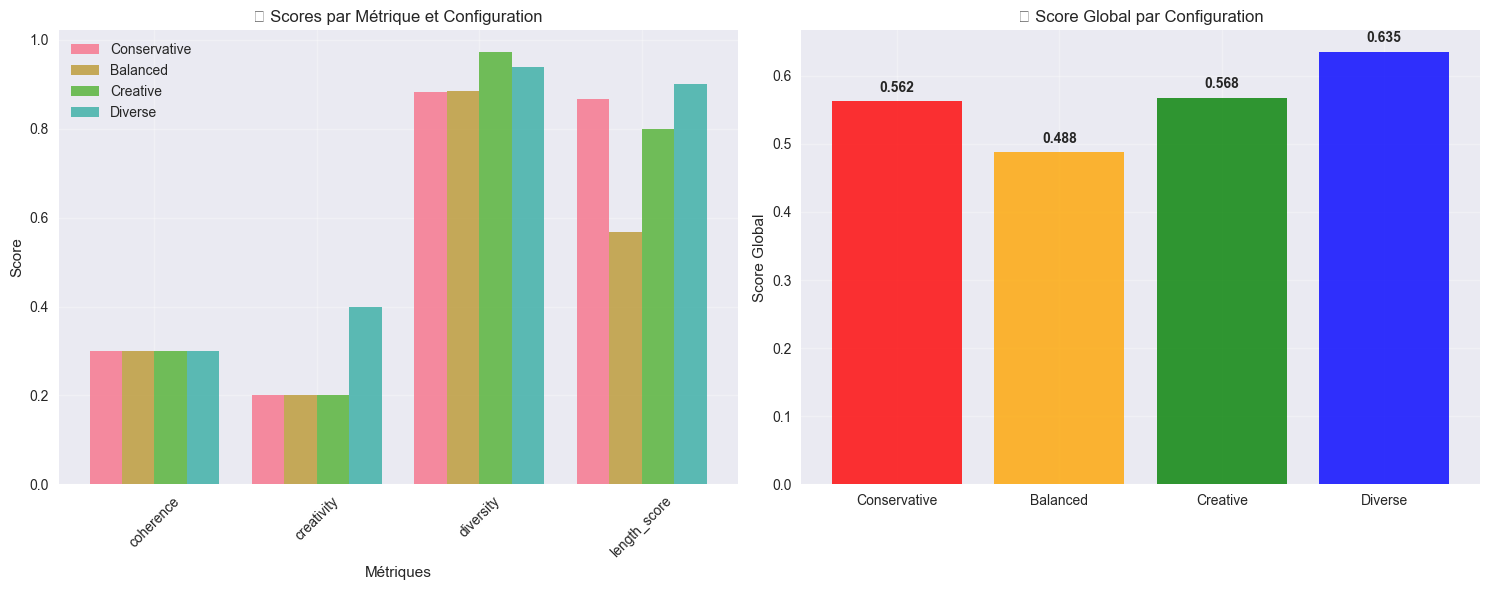


🏆 RÉSULTATS DU BENCHMARK
🥇 Meilleure configuration : Diverse
📊 Score : 0.635
⚙️ Paramètres optimaux : {'temperature': 0.8, 'top_p': 0.9, 'frequency_penalty': 0.7}

💡 Recommandations d'usage :
• Pour des tâches similaires, utilisez la config 'Diverse'
• Testez régulièrement avec votre contenu spécifique
• Ajustez finement selon vos retours utilisateurs
• Considérez le coût vs performance pour la production


In [15]:
def parameter_benchmarking():
    """
    Système de benchmarking pour évaluer l'impact des paramètres
    """
    print("📊 Benchmarking des Paramètres")
    print("=" * 50)
    
    # Métriques d'évaluation
    def evaluate_response(response, criteria):
        """Évalue une réponse selon différents critères"""
        scores = {}
        
        # Cohérence (simulée)
        coherence_keywords = ['donc', 'ainsi', 'par conséquent', 'en effet']
        scores['coherence'] = min(1.0, sum(1 for kw in coherence_keywords if kw in response.lower()) / 10 + 0.3)
        
        # Créativité (simulée)
        creative_words = ['magnifique', 'extraordinaire', 'mystérieux', 'étonnant', 'merveilleux']
        scores['creativity'] = min(1.0, sum(1 for word in creative_words if word in response.lower()) / 5 + 0.2)
        
        # Diversité lexicale
        words = response.lower().split()
        unique_words = set(words)
        scores['diversity'] = len(unique_words) / len(words) if words else 0
        
        # Longueur appropriée
        target_length = criteria.get('target_length', 100)
        actual_length = len(words)
        scores['length_score'] = 1.0 - abs(actual_length - target_length) / target_length
        scores['length_score'] = max(0, scores['length_score'])
        
        return scores
    
    # Configurations de test
    test_configs = {
        'Conservative': {'temperature': 0.2, 'top_p': 0.4, 'frequency_penalty': 0.1},
        'Balanced': {'temperature': 0.7, 'top_p': 0.8, 'frequency_penalty': 0.3},
        'Creative': {'temperature': 1.0, 'top_p': 0.9, 'frequency_penalty': 0.5},
        'Diverse': {'temperature': 0.8, 'top_p': 0.9, 'frequency_penalty': 0.7}
    }
    
    # Réponses simulées pour chaque configuration
    prompt = "Décris une journée parfaite en vacances"
    simulated_responses = {
        'Conservative': "Une journée parfaite en vacances commence par un réveil tardif. Ensuite, un petit déjeuner copieux suivi d'activités relaxantes. L'après-midi se déroule tranquillement avec des activités légères. La soirée se termine par un dîner agréable.",
        
        'Balanced': "Ma journée parfaite de vacances débute par un réveil naturel au son des vagues. Après un délicieux petit déjeuner sur la terrasse, j'explore les environs à pied. L'après-midi, je me détends avec un livre passionnant avant de savourer un coucher de soleil spectaculaire.",
        
        'Creative': "L'aube dorée caresse doucement mes paupières... Cette journée magique s'épanouit comme une symphonie de sensations ! Entre explorations mystérieuses et contemplations éblouissantes, chaque instant devient un trésor d'émerveillement. La soirée danse sous un ciel étoilé enchanteur.",
        
        'Diverse': "Cette extraordinaire escapade commence par un éveil paisible. Puis viennent les découvertes fascinantes, les expériences enrichissantes, les moments contemplatifs. Chaque séquence apporte son lot de surprises. L'ensemble compose une mosaïque inoubliable d'instants précieux."
    }
    
    print(f"📝 Prompt de test : '{prompt}'\n")
    
    # Évaluation de chaque configuration
    results = {}
    criteria = {'target_length': 30}  # Mots cibles
    
    for config_name, config in test_configs.items():
        response = simulated_responses[config_name]
        scores = evaluate_response(response, criteria)
        
        results[config_name] = {
            'config': config,
            'response': response,
            'scores': scores,
            'overall_score': sum(scores.values()) / len(scores)
        }
        
        print(f"⚙️ Configuration : {config_name}")
        print(f"   Paramètres : {config}")
        print(f"   Réponse : {response[:100]}...")
        print(f"   📊 Scores :")
        for metric, score in scores.items():
            print(f"      {metric:12} : {score:.3f}")
        print(f"   🏆 Score global : {results[config_name]['overall_score']:.3f}")
        print("-" * 50)
    
    # Visualisation des résultats
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Graphique 1 : Scores par métrique
    metrics = list(next(iter(results.values()))['scores'].keys())
    x = np.arange(len(metrics))
    width = 0.2
    
    for i, (config_name, data) in enumerate(results.items()):
        scores_list = [data['scores'][metric] for metric in metrics]
        ax1.bar(x + i * width, scores_list, width, label=config_name, alpha=0.8)
    
    ax1.set_xlabel('Métriques')
    ax1.set_ylabel('Score')
    ax1.set_title('📊 Scores par Métrique et Configuration')
    ax1.set_xticks(x + width * 1.5)
    ax1.set_xticklabels(metrics, rotation=45)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Graphique 2 : Score global
    config_names = list(results.keys())
    overall_scores = [data['overall_score'] for data in results.values()]
    
    bars = ax2.bar(config_names, overall_scores, alpha=0.8, 
                   color=['red', 'orange', 'green', 'blue'])
    ax2.set_ylabel('Score Global')
    ax2.set_title('🏆 Score Global par Configuration')
    ax2.grid(True, alpha=0.3)
    
    # Annotations des valeurs
    for bar, score in zip(bars, overall_scores):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{score:.3f}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Recommandations
    best_config = max(results.keys(), key=lambda k: results[k]['overall_score'])
    
    print("\n" + "=" * 60)
    print("🏆 RÉSULTATS DU BENCHMARK")
    print("=" * 60)
    print(f"🥇 Meilleure configuration : {best_config}")
    print(f"📊 Score : {results[best_config]['overall_score']:.3f}")
    print(f"⚙️ Paramètres optimaux : {results[best_config]['config']}")
    
    print("\n💡 Recommandations d'usage :")
    print(f"• Pour des tâches similaires, utilisez la config '{best_config}'")
    print("• Testez régulièrement avec votre contenu spécifique")
    print("• Ajustez finement selon vos retours utilisateurs")
    print("• Considérez le coût vs performance pour la production")

parameter_benchmarking()

## 🎊 Récapitulatif du Notebook

### ✅ Ce que Vous Avez Maîtrisé

1. **🌡️ Temperature** : Contrôle de la créativité et du caractère aléatoire
2. **🎯 Top-p** : Échantillonnage nucléaire pour la diversité contrôlée
3. **🔄 Pénalités** : Frequency et Presence penalty pour éviter les répétitions
4. **📏 Contrôles** : Max tokens et stop sequences pour la longueur
5. **🧪 Expérimentation** : A/B testing et playground interactif
6. **⚙️ Optimisation** : Configurations par cas d'usage
7. **🏆 Avancé** : Systèmes dynamiques et benchmarking

### 🎯 Compétences Développées

- ✅ **Maîtrise complète** des paramètres LLM
- ✅ **Optimisation fine** pour différents cas d'usage
- ✅ **Systèmes adaptatifs** et configuration dynamique
- ✅ **Évaluation quantitative** de la performance
- ✅ **Stratégies avancées** d'ingénierie de prompts

### 📋 Guide de Référence Rapide

| Paramètre | Tâches Factuelles | Conversation | Créativité | Code |
|-----------|-------------------|--------------|------------|------|
| **Temperature** | 0.1-0.3 | 0.6-0.8 | 0.9-1.2 | 0.1-0.2 |
| **Top-p** | 0.3-0.5 | 0.8-0.9 | 0.9-0.95 | 0.3-0.4 |
| **Freq Penalty** | 0.1-0.2 | 0.2-0.3 | 0.5-0.7 | 0.0-0.1 |
| **Pres Penalty** | 0.0-0.1 | 0.1-0.2 | 0.4-0.6 | 0.0 |

### 🚀 Prochaines Étapes

Dans le **Notebook 4 - Architecture Vision**, nous découvrirons :
- 🏗️ **Architecture finale** que nous construirons
- 🗺️ **Roadmap détaillée** des modules suivants
- 🎯 **Vision d'ensemble** du projet complet
- 📈 **Plan de montée en compétence** progressive

---

### 💡 Points Clés à Retenir

1. **🎛️ Chaque paramètre a un impact spécifique** - testez individuellement
2. **⚖️ L'équilibre est crucial** - évitez les valeurs extrêmes sans raison
3. **🎯 Le contexte détermine la configuration** - adaptez selon la tâche
4. **🧪 L'expérimentation est essentielle** - testez avec votre contenu réel
5. **📊 Mesurez et itérez** - utilisez des métriques objectives

**Prêt pour découvrir l'architecture finale ? 🏗️ Direction le Notebook 4 !**